<IPython.core.display.Javascript object>


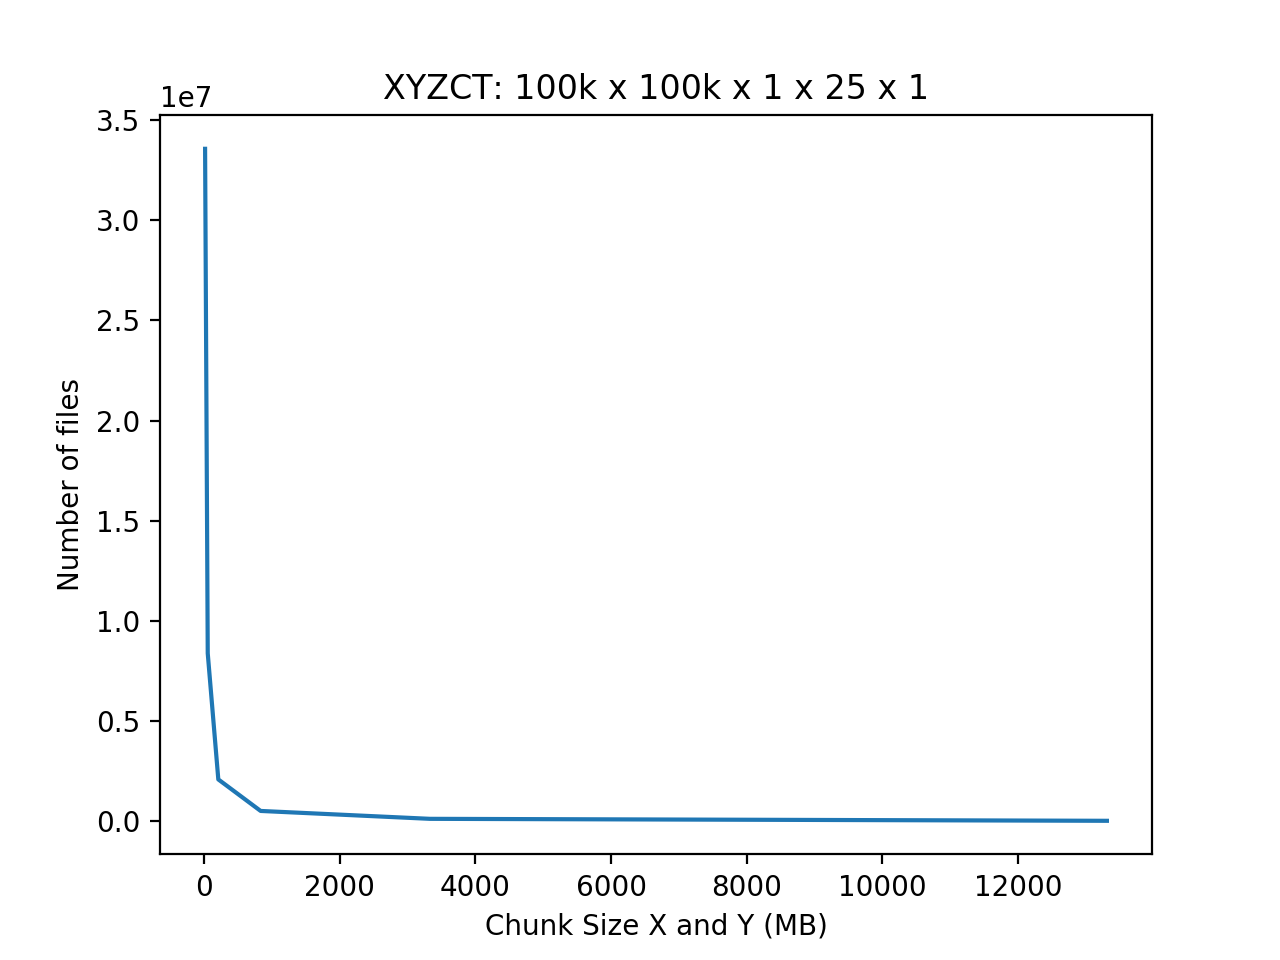

interactive(children=(Dropdown(description='scale', options=('linear', 'log'), value='linear'), Output()), _do…

interactive(children=(IntSlider(value=13, description='chunkC', max=25, min=1), Checkbox(value=True, descripti…

In [8]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
import math

x = 131072
y = 131072
z = 1
t = 1
c = 25
chunkSizes = [32, 64, 128, 256, 512, 1024]
chunkT = 1
chunkZ = 1
chunkC = 1
numFiles = []
for i in chunkSizes:
    numFiles.__iadd__([(math.ceil(x/i) * math.ceil(y/i) * math.ceil(z/chunkZ) * math.ceil(t/chunkT) * math.ceil(c/chunkC))])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.xlabel('Chunk Size X and Y')
plt.ylabel('Number of files')
plt.title("XYZCT: 100k x 100k x 1 x 25 x 1");
line, = ax.plot(chunkSizes,numFiles)

def update(chunkC, displayMB, reScaleAxis):
    global line
    numFiles = []
    fileSize = []
    for i in chunkSizes:
        numFiles.__iadd__([(math.ceil(x/i) * math.ceil(y/i) * math.ceil(z/1) * math.ceil(t/1) * math.ceil(c/chunkC))])
        fileSize.__iadd__([int((i * i * chunkC) / 1024)])
    line.set_ydata(numFiles)
    if displayMB:
        plt.xlabel('Chunk Size X and Y (MB)')
        line.set_xdata(fileSize)
    else:
        plt.xlabel('Chunk Size X and Y')
        line.set_xdata(chunkSizes)
    if reScaleAxis:
        ax.relim()
        ax.autoscale_view()
    for i in range(len(numFiles)):
        print("X and Y chunk size:", chunkSizes[i], "    Number of files:", numFiles[i],"    Size in MB:", fileSize[i])
    fig.canvas.draw_idle()

def scale(scale):
    plt.yscale(scale)
    plt.xscale(scale)

interact(scale, scale=['linear','log']);
interact(update, chunkC = (1,25), displayMB=True, reScaleAxis=True);